In [1]:
import keras
import matplotlib.pyplot as plt
from tensorflow.python.keras.saving.saved_model.serialized_attributes import metrics

'''
    手写阿拉伯数字识别(基于像素的识别)
'''
import tensorflow as tf
#导入数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#特征工程
x_train, x_test = x_train / 255.0, x_test / 255.0

#定义神经层
inputs = tf.keras.Input(shape=(28,28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)

#构建模型层
model = tf.keras.Model(inputs=inputs,outputs=outputs)

#模型编译
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#训练模型
model.fit(x_train,y_train,epochs=5)
#评估模型
model.evaluate(x_test,y_test)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8561 - loss: 0.4948
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9544 - loss: 0.1553
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9669 - loss: 0.1111
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9716 - loss: 0.0922
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9771 - loss: 0.0743
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9739 - loss: 0.0821


[0.07001392543315887, 0.9779000282287598]

In [15]:
'''
    识别阿拉伯数字的过程拆解
'''
import tensorflow as tf
import matplotlib.pyplot as plt

# 1.加载minist手写阿拉伯数字数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

# 2.EDA,对数据集进行探索和分析,首先观察训练数据的目标值y,即影响的真实效果
print(y_train[:20])
print("\n============================================\n")
# data = x_train[2].copy()
# data[data > 0] = 1
# text_image=[]
# for i in range(data.shape[0]):
#     text_image.append(''.join(str(data[i])))
# text_image
# 绘制训练数据的图像
# for i in range(5):
#     plt.imshow(x_train[i].reshape(28,28), cmap='gray')
#     plt.axis('off')
#     plt.show()

# 3.特征工程,将特征缩放到(0,1)区间,特征缩放可以提高模型准确度,并且加快收敛速度。特征缩放采用正态化(Normalization)公式
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
#打印正态化之后的图像
x_train_norm[1]

#4.数据切割及测试数据,MNIST数据已经切割好了

# 5.建立模型结构,分为顺序型和Funcation API模型

inputs = tf.keras.Input(shape=(28,28))
layer = tf.keras.layers.Flatten()(inputs) #将28*28的矩阵拉直成784维的向量
#完全连接层,输入为上一层的输出,输出为128个神经元,即构成128条回归线,每条回归线有784个特征。
layer = tf.keras.layers.Dense(128,activation='relu')(layer)
#矫正过渡拟合,随机丢弃20%的神经元
layer = tf.keras.layers.Dropout(0.2)(layer)
#输出层(完全连接层),因为要辨识0-9十个数字,所以输出层有10个神经元,即10个分类。
#透过Softmax Activation Function,可以将输出转为概率形式,即预测0~9的个别概率,再选概率最大值为预测结果。
outputs = tf.keras.layers.Dense(10,activation='softmax')(layer)

model = tf.keras.Model(inputs=inputs,outputs=outputs)
#编译指令,优化器采用Adam,损失函数采用sparse_categorical_crossentropy(交叉熵),评估指标采用accuracy
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
              )

#6.结合训练数据及模型结构,进行模型训练
history = model.fit(x_train_norm,y_train,epochs=5,validation_split=0.2)
#6.1对训练过程中的准确率绘图
# 设置字体为 SimHei，支持中文
# plt.rcParams['font.sans-serif'] = ['SimHei']
# ## 设置负号为普通减号
# plt.rcParams['axes.unicode_minus'] = False

'''
    随着执行周期数增加,准确率提升
'''
# plt.figure(figsize=(12,6))
# plt.plot(history.history['sparse_categorical_accuracy'],'r',label='训练集准确率')
# plt.plot(history.history['val_sparse_categorical_accuracy'],'g',label='验证集准确率')
# plt.legend()

#6.2 训练过程中的损失绘图
# plt.figure(figsize=(8,6))
# plt.plot(history.history['loss'],'r',label='训练集损失')
# plt.plot(history.history['val_loss'],'g',label='验证集损失')
# plt.legend()

#7.评分(Score Model),使用evaluate()函数,输入测试数据,计算出损失和准确率
print("===============模型评分=========================")
score = model.evaluate(x_test_norm,y_test,verbose=1)
for i,x in enumerate(score):
    print(f'{model.metrics_names[i]}:{score[i]:.4f}')

#实际预测20个数组
print("===============实际预测20个数组===============")
# 使用 model.predict() 获取概率值
predictions_prob = model.predict(x_test_norm)
# 将概率转换为类别（假设是多分类任务）
predictions = predictions_prob.argmax(axis=-1)

print('actual :',y_test[0:20])
print('predict:',predictions[0:20])

#显示第9个的概率,对样本中的第9个元素预测
import numpy as np

predictions = model.predict(x_test_norm[1:2])
print(f'第2个元素预测为:{predictions.argmax(axis=-1)}')
print(f'第2个元素为:{y_test[1:2]}')
print(f'0~9的概率为:{np.round(predictions[0],2)}')


#8,效果评估,可调校相关超参数以及模型结构,寻找最佳模型和参数。超参数是模型结构外的参数,如学习率、正则化系数、网络层数、网络深度等。
#9.模型部署,将最佳模型存盘,再开发用户接口或提供API

#模型存档
print("===================模型存档=============================")
'''
HDF5格式（.h5）：是Keras早期版本中默认的模型保存格式，但它存在一些局限性，例如不支持某些新特性。
新版本推荐Keras原生格式.keras
'''
model.save('mnist_model.keras')

#模型载入
# model = tf.keras.models.load_model('mnist_model.h5')

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.5399 - sparse_categorical_accuracy: 0.8410 - val_loss: 0.1597 - val_sparse_categorical_accuracy: 0.9532
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1715 - sparse_categorical_accuracy: 0.9498 - val_loss: 0.1151 - val_sparse_categorical_accuracy: 0.9664
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.1282 - sparse_categorical_accuracy: 0.9614 - val_loss: 0.1010 - val_sparse_categorical_accuracy: 0.9700
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0994 - sparse_categorical_accuracy: 0.9701 - val_loss: 0.0934 - val_sparse_categorical_accuracy: 0.9730
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0827 - sparse_categorical_accuracy: 0.9743 - val_loss: 0.0915 - val_sparse_categorical_accuracy: 0.9743
===============模型评分=========================
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0949 - sparse_categorical

===================接收新数据进行预测=============================
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
预测为:[9]
[[0.02732657 0.04177075 0.04990091 0.0642039  0.20652124 0.12028474
  0.0192106  0.19599602 0.02735769 0.24742757]]
===============显示模型汇总信息====================


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

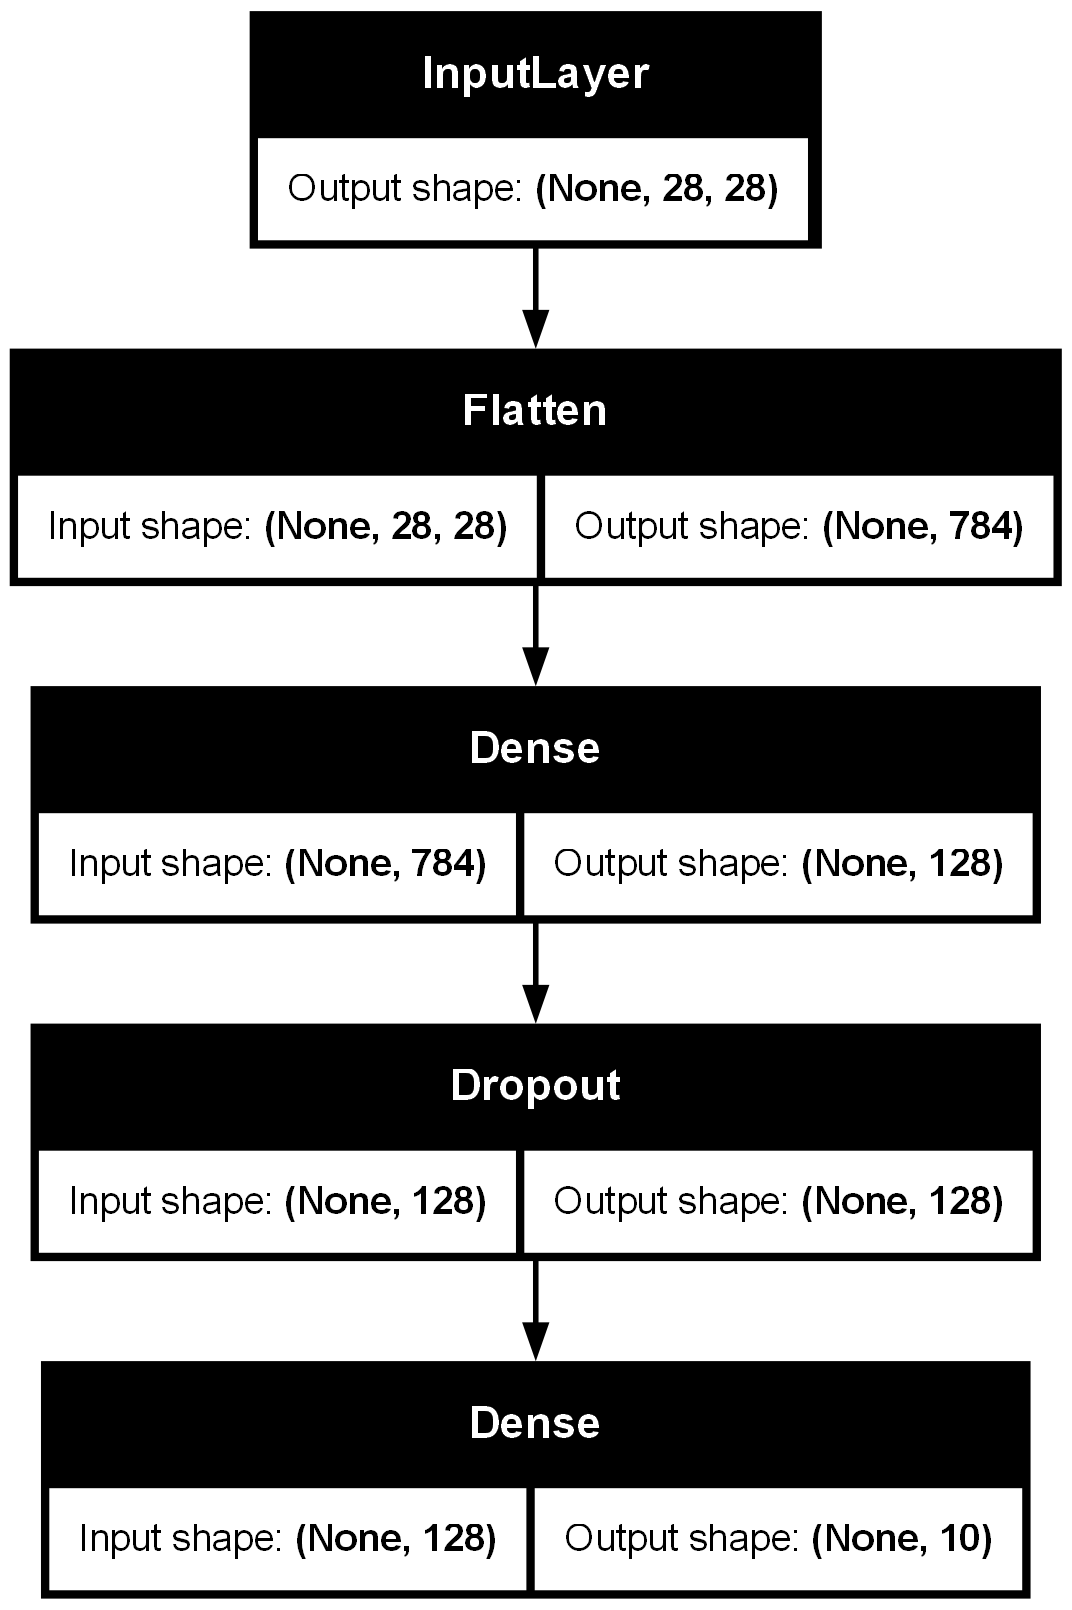

In [31]:
'''
    加载模型进行预测
'''
from skimage import io
from skimage.transform import resize
import numpy as np

model = tf.keras.models.load_model('mnist_model.keras')

#10,接收新数据进行预测
print("===================接收新数据进行预测=============================")
upload_file = "./digit_image/8.png"
img = io.imread(upload_file, as_gray=True)

#缩为(28,28)大小的影像
image_resized = resize(img, (28, 28), anti_aliasing=True)
X1 = image_resized.reshape(1, 28, 28) #/255

#反转颜色,颜色0为白色,与RGB色码不同,它的0为黑色
X1 = np.absolute(1-X1)

#预测
predictions = model.predict(X1)
print(f'预测为:{predictions.argmax(axis=-1)}')
print(predictions)

print("===============显示模型汇总信息====================")
#输出层参数是1290,即共有10条回归线,每条回归线有128个特征对应的权重w和一个偏差项b,
#共有1290个参数。
model.summary()

#绘制图形,显示模型结构 pip install graphviz pydotplus
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
'''
    第二部分,keras的模型种类
    1)Seqential Model
    2)Functional API
'''